In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import geopandas as gpd
import matplotlib.ticker as mticker
import requests
import zipfile
import io

In [34]:
import pandas as pd

# Load the data from the uploaded CSV file
file_path = 'sam-resources/data_interpolated.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,Date,CityName,StateName,MedianSalePrice,Year,MedianListPrice,SalesTotal,Total Population,Median Income,MORTGAGE30US,Unemployment Rate,HAI
0,2008-02-29,United States,NaN,174000.0,2008.0,NaN,205206.0,NaN,NaN,NaN,NaN,NaN
1,2008-02-29,New York,NY,400000.0,2008.0,NaN,8591.0,NaN,NaN,NaN,NaN,NaN
2,2008-02-29,Los Angeles,CA,470000.0,2008.0,NaN,4159.0,NaN,NaN,NaN,NaN,NaN
3,2008-02-29,Chicago,IL,224000.0,2008.0,NaN,5933.0,NaN,NaN,NaN,NaN,NaN
4,2008-02-29,Dallas,TX,138000.0,2008.0,NaN,5058.0,NaN,NaN,NaN,NaN,NaN


/var/folders/yk/gblyv4gs4s5fjfks1jm4lkhw0000gp/T/ipykernel_12729/3382257964.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Date'] = pd.to_datetime(filtered_data['Date'])


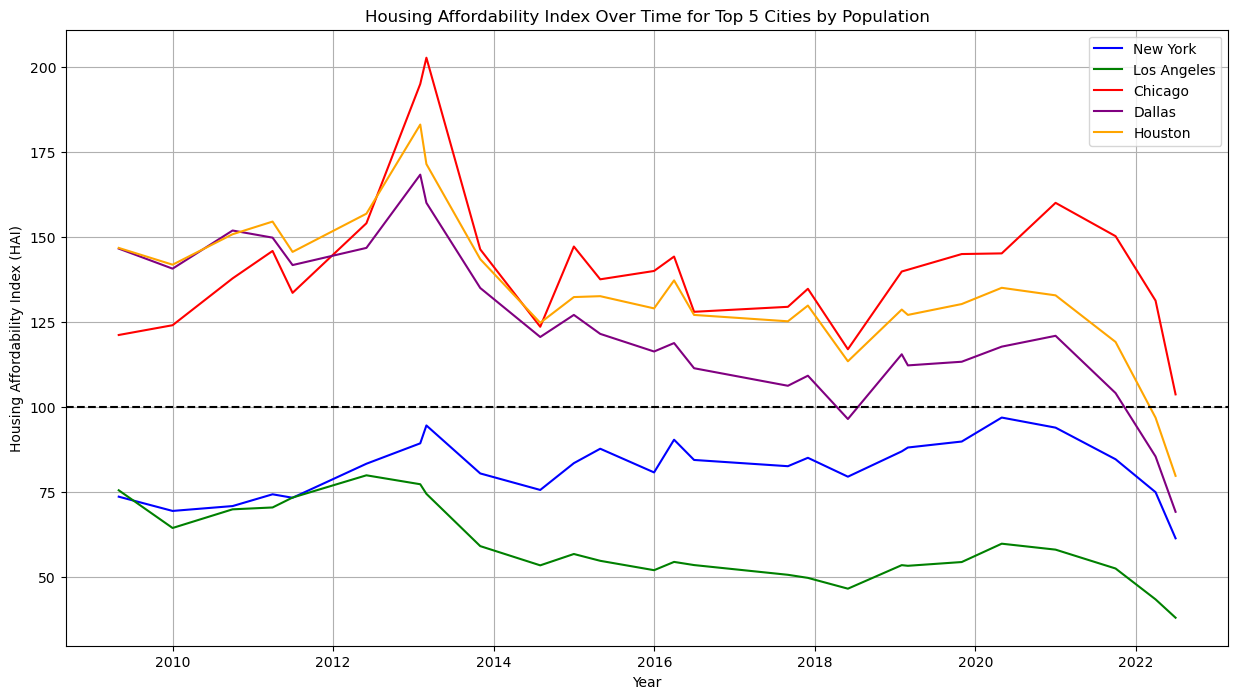

In [35]:
# Filter out the top 5 cities by population (assuming they are New York, Los Angeles, Chicago, Dallas, Houston)
top_cities = ['New York', 'Los Angeles', 'Chicago', 'Dallas', 'Houston']

# Filter the data for these cities and for non-null HAI (Housing Affordability Index) values
filtered_data = data[data['CityName'].isin(top_cities) & data['HAI'].notnull()]

# Convert Date to datetime for plotting
filtered_data['Date'] = pd.to_datetime(filtered_data['Date'])

# Plotting with different colors for better differentiation
colors = ['blue', 'green', 'red', 'purple', 'orange']

plt.figure(figsize=(15, 8))

for city, color in zip(top_cities, colors):
    city_data = filtered_data[filtered_data['CityName'] == city]
    plt.plot(city_data['Date'], city_data['HAI'], label=city, color=color)

plt.title('Housing Affordability Index Over Time for Top 5 Cities by Population')
plt.xlabel('Year')
plt.ylabel('Housing Affordability Index (HAI)')
plt.legend()
plt.grid(True)
# Add a horizontal line at 100 to indicate the threshold for affordability
plt.axhline(y=100, color='black', linestyle='--')
plt.savefig('png/Housing Affordability Index Over Time for Top 5 Cities by Population.png', dpi = 300)
plt.show()



/var/folders/yk/gblyv4gs4s5fjfks1jm4lkhw0000gp/T/ipykernel_12729/3464063011.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data_top_cities['Date'] = pd.to_datetime(sales_data_top_cities['Date'])


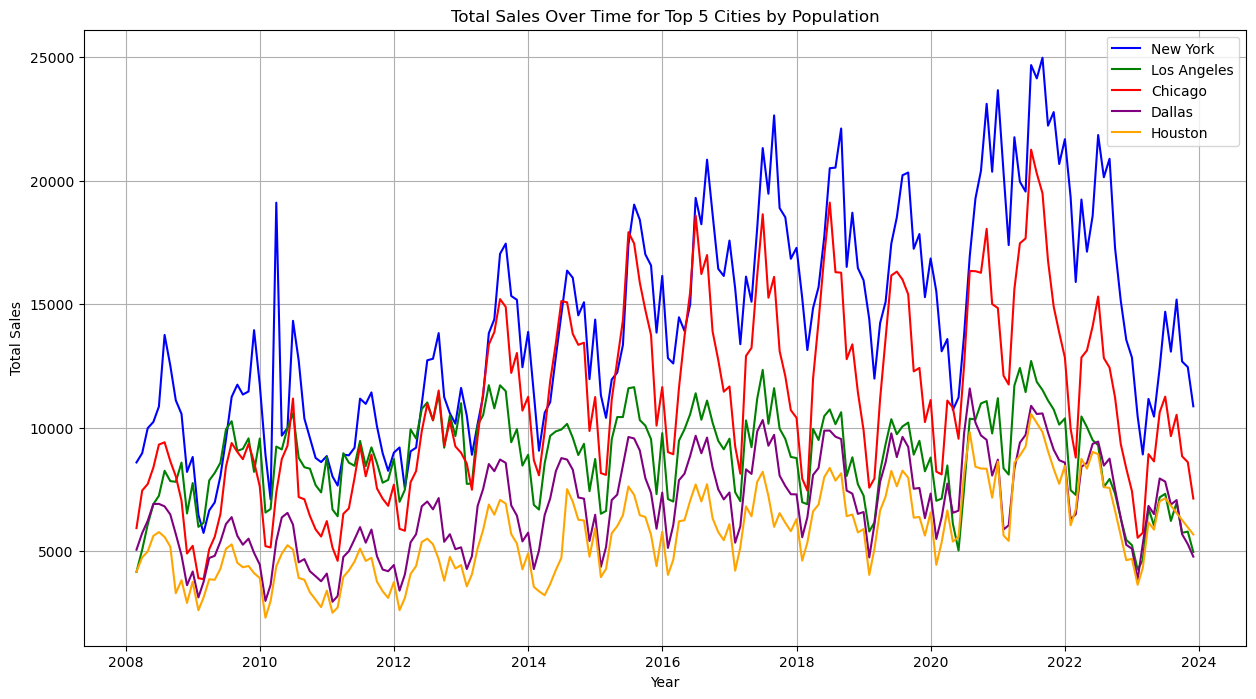

In [36]:


# Filter the data for total sales in the top 5 cities by population (New York, Los Angeles, Chicago, Dallas, Houston)
# and for non-null SalesTotal values
top_cities_sales = ['New York', 'Los Angeles', 'Chicago', 'Dallas', 'Houston']
sales_data_top_cities = data[data['CityName'].isin(top_cities_sales) & data['SalesTotal'].notnull()]

# Convert Date to datetime for plotting
sales_data_top_cities['Date'] = pd.to_datetime(sales_data_top_cities['Date'])

# Colors for each city
colors_for_sales_cities = ['blue', 'green', 'red', 'purple', 'orange']

# Plotting with updated colors
plt.figure(figsize=(15, 8))

for city, color in zip(top_cities_sales, colors_for_sales_cities):
    city_sales_data = sales_data_top_cities[sales_data_top_cities['CityName'] == city]
    plt.plot(city_sales_data['Date'], city_sales_data['SalesTotal'], label=city, color=color)

plt.title('Total Sales Over Time for Top 5 Cities by Population')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.savefig('png/Total Sales Over Time for Top 5 Cities by Population.png', dpi = 300)
plt.show()


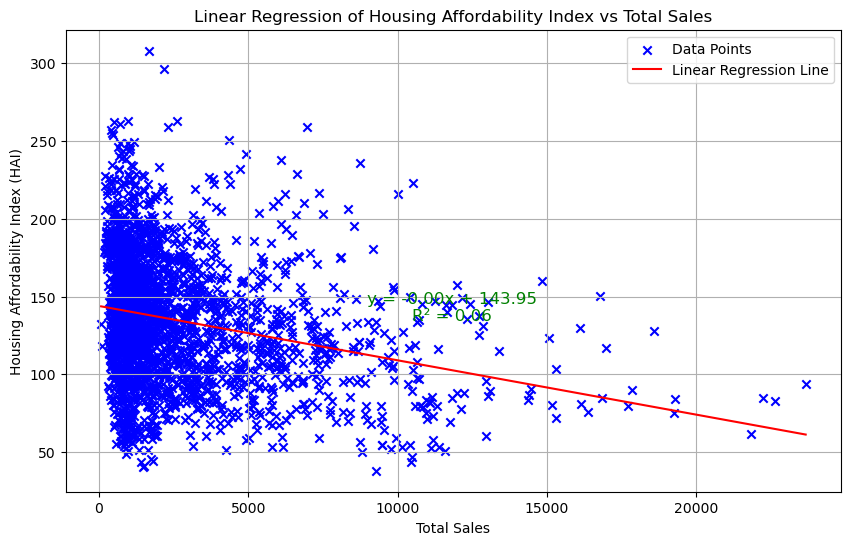

In [37]:
# Filter out rows with null values for SalesTotal and HAI
sales_hai_data = data[['SalesTotal', 'HAI']].dropna()

# Using scipy for linear regression on Housing Affordability Index vs Total Sales
slope_hai_sales, intercept_hai_sales, r_value_hai_sales, _, _ = stats.linregress(sales_hai_data['SalesTotal'], sales_hai_data['HAI'])

# Preparing data for the regression line plot
X_hai = sales_hai_data['HAI'].values
y_sales = sales_hai_data['SalesTotal'].values
X_hai_pred = np.linspace(y_sales.min(), y_sales.max(), 100)
y_hai_pred = slope_hai_sales * X_hai_pred + intercept_hai_sales

# Plotting HAI vs Total Sales with linear regression
plt.figure(figsize=(10, 6))
plt.scatter(y_sales, X_hai, color='blue', label='Data Points', marker='x')
plt.plot(X_hai_pred, y_hai_pred, color='red', label='Linear Regression Line')

# Adding regression information in the plot
regression_info_hai_sales = f'y = {slope_hai_sales:.2f}x + {intercept_hai_sales:.2f}\nR² = {r_value_hai_sales**2:.2f}'
plt.text(y_sales.max() * 0.5, X_hai.mean(), regression_info_hai_sales, fontsize=12, ha='center', color='green')

plt.title('Linear Regression of Housing Affordability Index vs Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Housing Affordability Index (HAI)')
plt.legend()
plt.grid(True)
plt.savefig('png/Linear Regression of Housing Affordability Index vs Total Sales.png', dpi = 300)

plt.show()


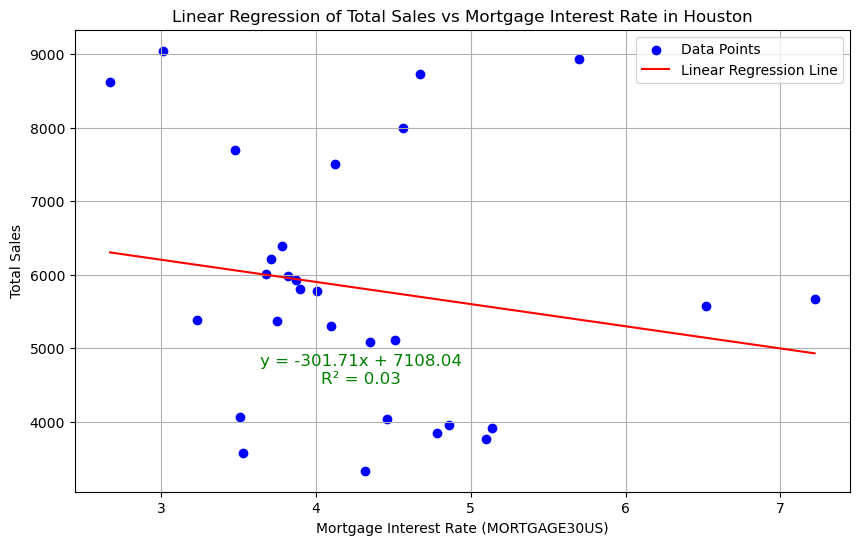

In [38]:


# Filtering the data for Houston and performing linear regression on Total Sales vs Mortgage Interest Rate for Houston
houston_data = data[data['CityName'] == 'Houston'].dropna(subset=['SalesTotal', 'MORTGAGE30US'])
slope_houston, intercept_houston, r_value_houston, _, _ = stats.linregress(houston_data['MORTGAGE30US'], houston_data['SalesTotal'])

# Preparing data for the regression line plot
X_houston_mortgage = houston_data['MORTGAGE30US'].values
y_houston_sales = houston_data['SalesTotal'].values
X_houston_mortgage_pred = np.linspace(X_houston_mortgage.min(), X_houston_mortgage.max(), 100)
y_houston_sales_pred = slope_houston * X_houston_mortgage_pred + intercept_houston

# Plotting Total Sales vs Mortgage Interest Rate for Houston with linear regression
plt.figure(figsize=(10, 6))
plt.scatter(X_houston_mortgage, y_houston_sales, color='blue', label='Data Points')
plt.plot(X_houston_mortgage_pred, y_houston_sales_pred, color='red', label='Linear Regression Line')

# Adding regression information in the plot
regression_info_houston = f'y = {slope_houston:.2f}x + {intercept_houston:.2f}\nR² = {r_value_houston**2:.2f}'
plt.text(X_houston_mortgage.mean(), y_houston_sales.max() * 0.5, regression_info_houston, fontsize=12, ha='center', color='green')

plt.title('Linear Regression of Total Sales vs Mortgage Interest Rate in Houston')
plt.xlabel('Mortgage Interest Rate (MORTGAGE30US)')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.savefig('png/Linear Regression of Total Sales vs Mortgage Interest Rate in Houston.png', dpi = 300)

plt.show()


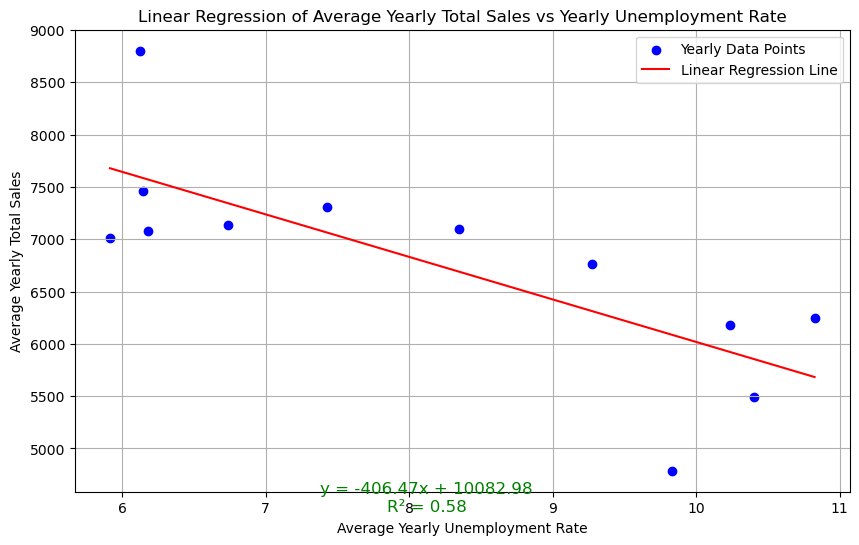

In [39]:
# First, we need to calculate the average yearly total sales and the average yearly unemployment rate
yearly_data = data.groupby('Year').agg({'SalesTotal': 'mean', 'Unemployment Rate': 'mean'}).dropna()

# Performing linear regression on average yearly total sales vs average yearly unemployment rate
slope_yearly, intercept_yearly, r_value_yearly, _, _ = stats.linregress(yearly_data['Unemployment Rate'], yearly_data['SalesTotal'])

# Preparing data for the regression line plot
X_yearly_unemployment = yearly_data['Unemployment Rate'].values
y_yearly_sales = yearly_data['SalesTotal'].values
X_yearly_unemployment_pred = np.linspace(X_yearly_unemployment.min(), X_yearly_unemployment.max(), 100)
y_yearly_sales_pred = slope_yearly * X_yearly_unemployment_pred + intercept_yearly

# Plotting average yearly total sales vs average yearly unemployment rate with linear regression
plt.figure(figsize=(10, 6))
plt.scatter(X_yearly_unemployment, y_yearly_sales, color='blue', label='Yearly Data Points')
plt.plot(X_yearly_unemployment_pred, y_yearly_sales_pred, color='red', label='Linear Regression Line')

# Adding regression information in the plot
regression_info_yearly = f'y = {slope_yearly:.2f}x + {intercept_yearly:.2f}\nR² = {r_value_yearly**2:.2f}'
plt.text(X_yearly_unemployment.mean(), y_yearly_sales.max() * 0.5, regression_info_yearly, fontsize=12, ha='center', color='green')

plt.title('Linear Regression of Average Yearly Total Sales vs Yearly Unemployment Rate')
plt.xlabel('Average Yearly Unemployment Rate')
plt.ylabel('Average Yearly Total Sales')
plt.legend()
plt.grid(True)
plt.savefig('png/Linear Regression of Average Yearly Total Sales vs Yearly Unemployment Rate.png', dpi = 300)

plt.show()


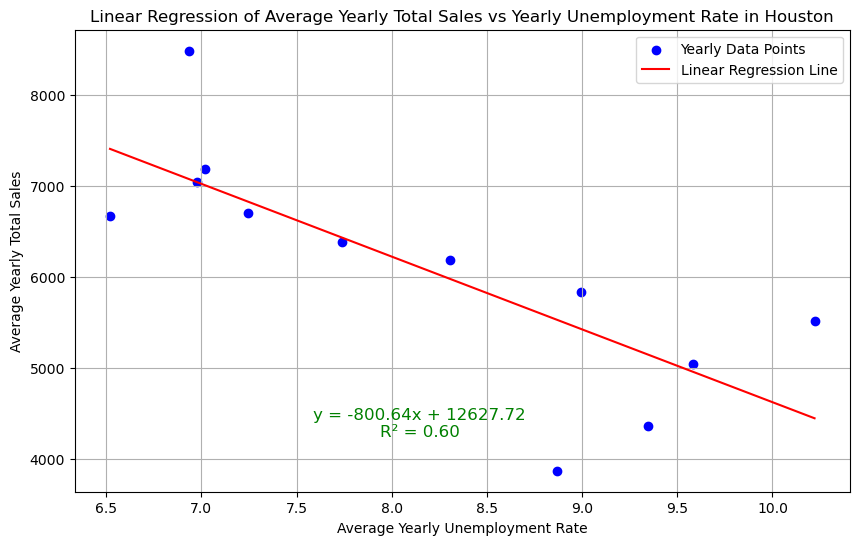

In [40]:
# Filtering data for Houston and calculating the average yearly total sales and the average yearly unemployment rate
houston_yearly_data = data[data['CityName'] == 'Houston'].groupby('Year').agg({'SalesTotal': 'mean', 'Unemployment Rate': 'mean'}).dropna()

# Performing linear regression on average yearly total sales vs average yearly unemployment rate for Houston
slope_houston_yearly, intercept_houston_yearly, r_value_houston_yearly, _, _ = stats.linregress(houston_yearly_data['Unemployment Rate'], houston_yearly_data['SalesTotal'])

# Preparing data for the regression line plot
X_houston_yearly_unemployment = houston_yearly_data['Unemployment Rate'].values
y_houston_yearly_sales = houston_yearly_data['SalesTotal'].values
X_houston_yearly_unemployment_pred = np.linspace(X_houston_yearly_unemployment.min(), X_houston_yearly_unemployment.max(), 100)
y_houston_yearly_sales_pred = slope_houston_yearly * X_houston_yearly_unemployment_pred + intercept_houston_yearly

# Plotting average yearly total sales vs average yearly unemployment rate for Houston with linear regression
plt.figure(figsize=(10, 6))
plt.scatter(X_houston_yearly_unemployment, y_houston_yearly_sales, color='blue', label='Yearly Data Points')
plt.plot(X_houston_yearly_unemployment_pred, y_houston_yearly_sales_pred, color='red', label='Linear Regression Line')

# Adding regression information in the plot
regression_info_houston_yearly = f'y = {slope_houston_yearly:.2f}x + {intercept_houston_yearly:.2f}\nR² = {r_value_houston_yearly**2:.2f}'
plt.text(X_houston_yearly_unemployment.mean(), y_houston_yearly_sales.max() * 0.5, regression_info_houston_yearly, fontsize=12, ha='center', color='green')

plt.title('Linear Regression of Average Yearly Total Sales vs Yearly Unemployment Rate in Houston')
plt.xlabel('Average Yearly Unemployment Rate')
plt.ylabel('Average Yearly Total Sales')
plt.legend()
plt.grid(True)
plt.savefig('png/Linear Regression of Average Yearly Total Sales vs Yearly Unemployment Rate in Houston.png', dpi = 300)

plt.show()


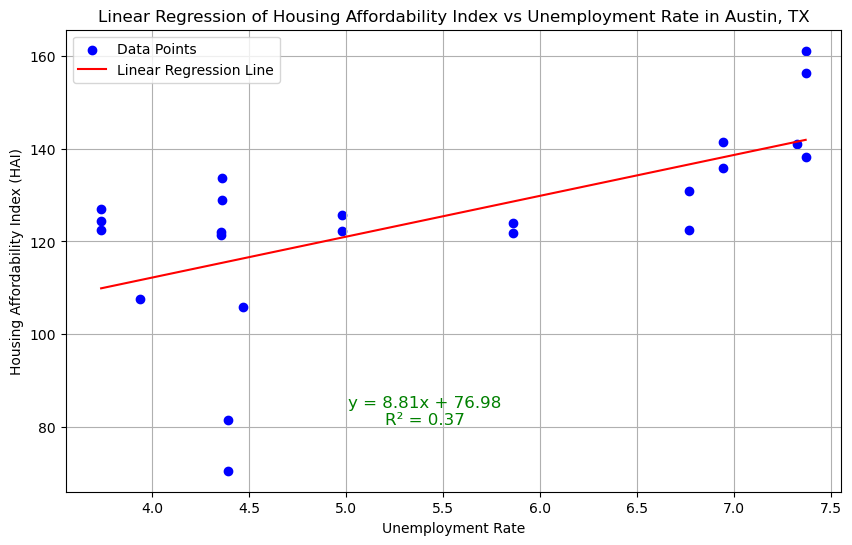

In [41]:
# Filtering data for Austin, TX for Housing Affordability Index and Unemployment Rate and performing linear regression
austin_data = data[(data['CityName'] == 'Austin') & (data['StateName'] == 'TX')].dropna(subset=['HAI', 'Unemployment Rate'])
slope_austin, intercept_austin, r_value_austin, _, _ = stats.linregress(austin_data['Unemployment Rate'], austin_data['HAI'])

# Preparing data for the regression line plot
X_austin_unemployment = austin_data['Unemployment Rate'].values
y_austin_hai = austin_data['HAI'].values
X_austin_unemployment_pred = np.linspace(X_austin_unemployment.min(), X_austin_unemployment.max(), 100)
y_austin_hai_pred = slope_austin * X_austin_unemployment_pred + intercept_austin

# Plotting Housing Affordability Index vs Unemployment Rate for Austin, TX with linear regression and including regression information
plt.figure(figsize=(10, 6))
plt.scatter(X_austin_unemployment, y_austin_hai, color='blue', label='Data Points')
plt.plot(X_austin_unemployment_pred, y_austin_hai_pred, color='red', label='Linear Regression Line')

# Adding regression information in the plot
regression_info_austin = f'y = {slope_austin:.2f}x + {intercept_austin:.2f}\nR² = {r_value_austin**2:.2f}'
plt.text(X_austin_unemployment.mean(), y_austin_hai.max() * 0.5, regression_info_austin, fontsize=12, ha='center', color='green')

plt.title('Linear Regression of Housing Affordability Index vs Unemployment Rate in Austin, TX')
plt.xlabel('Unemployment Rate')
plt.ylabel('Housing Affordability Index (HAI)')
plt.legend()
plt.grid(True)
plt.savefig('png/Linear Regression of Housing Affordability Index vs Unemployment Rate in Austin, TX.png', dpi = 300)

plt.show()


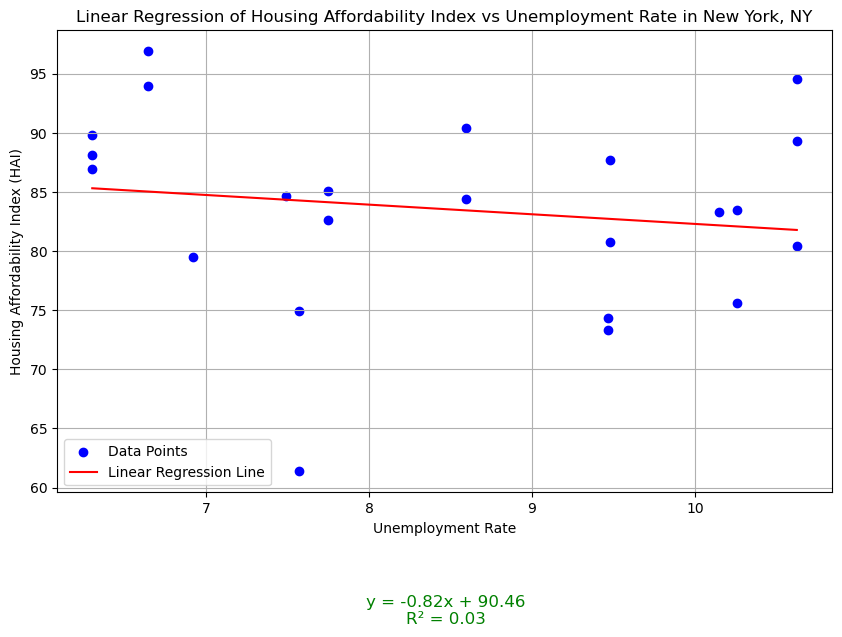

In [42]:


# Filtering the data for New York, NY for Housing Affordability Index and Unemployment Rate
new_york_data = data[(data['CityName'] == 'New York') & (data['StateName'] == 'NY')].dropna(subset=['HAI', 'Unemployment Rate'])
slope_ny_hai, intercept_ny_hai, r_value_ny_hai, _, _ = stats.linregress(new_york_data['Unemployment Rate'], new_york_data['HAI'])

# Preparing data for the regression line plot
X_ny_unemployment_hai = new_york_data['Unemployment Rate'].values
y_ny_hai = new_york_data['HAI'].values
X_ny_unemployment_hai_pred = np.linspace(X_ny_unemployment_hai.min(), X_ny_unemployment_hai.max(), 100)
y_ny_hai_pred = slope_ny_hai * X_ny_unemployment_hai_pred + intercept_ny_hai

# Plotting Housing Affordability Index vs Unemployment Rate for New York, NY with linear regression and including regression information
plt.figure(figsize=(10, 6))
plt.scatter(X_ny_unemployment_hai, y_ny_hai, color='blue', label='Data Points')
plt.plot(X_ny_unemployment_hai_pred, y_ny_hai_pred, color='red', label='Linear Regression Line')

# Adding regression information in the plot
regression_info_ny_hai = f'y = {slope_ny_hai:.2f}x + {intercept_ny_hai:.2f}\nR² = {r_value_ny_hai**2:.2f}'
plt.text(X_ny_unemployment_hai.mean(), y_ny_hai.max() * 0.5, regression_info_ny_hai, fontsize=12, ha='center', color='green')

plt.title('Linear Regression of Housing Affordability Index vs Unemployment Rate in New York, NY')
plt.xlabel('Unemployment Rate')
plt.ylabel('Housing Affordability Index (HAI)')
plt.legend()
plt.grid(True)
plt.savefig('png/Linear Regression of Housing Affordability Index vs Unemployment Rate in New York, NY.png', dpi = 300)

plt.show()


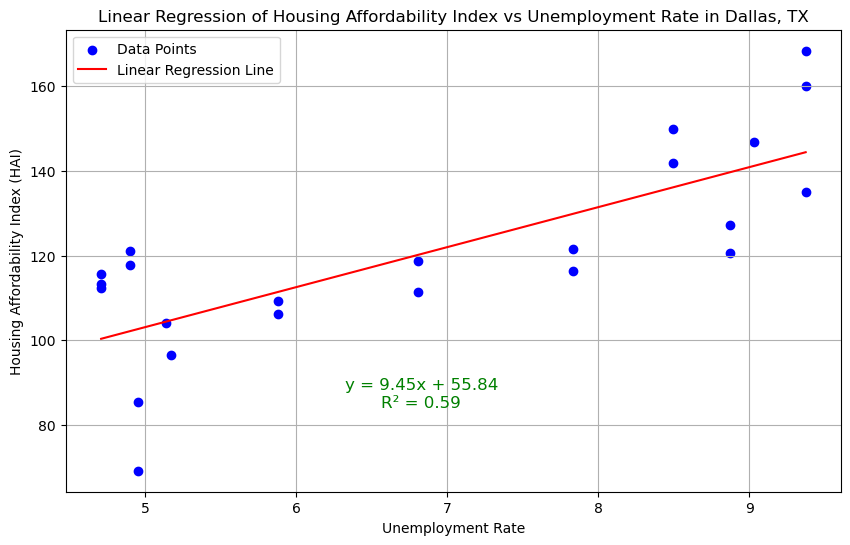

In [43]:

# Filtering the data for Dallas, TX for Housing Affordability Index and Unemployment Rate
dallas_data = data[(data['CityName'] == 'Dallas') & (data['StateName'] == 'TX')].dropna(subset=['HAI', 'Unemployment Rate'])
slope_dallas_hai, intercept_dallas_hai, r_value_dallas_hai, _, _ = stats.linregress(dallas_data['Unemployment Rate'], dallas_data['HAI'])

# Preparing data for the regression line plot
X_dallas_unemployment_hai = dallas_data['Unemployment Rate'].values
y_dallas_hai = dallas_data['HAI'].values
X_dallas_unemployment_hai_pred = np.linspace(X_dallas_unemployment_hai.min(), X_dallas_unemployment_hai.max(), 100)
y_dallas_hai_pred = slope_dallas_hai * X_dallas_unemployment_hai_pred + intercept_dallas_hai

# Plotting Housing Affordability Index vs Unemployment Rate for Dallas, TX with linear regression
plt.figure(figsize=(10, 6))
plt.scatter(X_dallas_unemployment_hai, y_dallas_hai, color='blue', label='Data Points')
plt.plot(X_dallas_unemployment_hai_pred, y_dallas_hai_pred, color='red', label='Linear Regression Line')

# Adding regression information in the plot
regression_info_dallas_hai = f'y = {slope_dallas_hai:.2f}x + {intercept_dallas_hai:.2f}\nR² = {r_value_dallas_hai**2:.2f}'
plt.text(X_dallas_unemployment_hai.mean(), y_dallas_hai.max() * 0.5, regression_info_dallas_hai, fontsize=12, ha='center', color='green')

plt.title('Linear Regression of Housing Affordability Index vs Unemployment Rate in Dallas, TX')
plt.xlabel('Unemployment Rate')
plt.ylabel('Housing Affordability Index (HAI)')
plt.legend()
plt.grid(True)
plt.savefig('png/Linear Regression of Housing Affordability Index vs Unemployment Rate in Dallas, TX.png', dpi = 300)

plt.show()


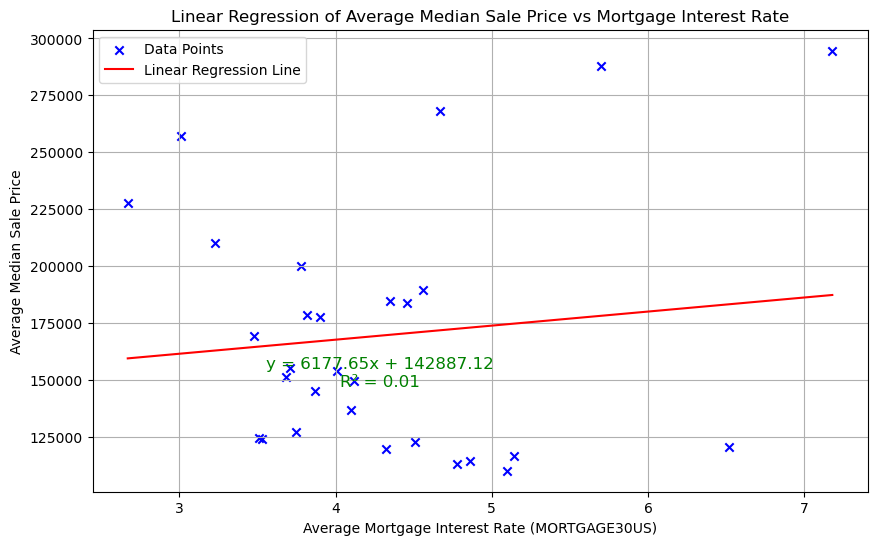

In [44]:


# Calculating the average median sale price for each date
avg_median_sale_price_data = data.groupby('Date').agg({'MedianSalePrice': 'mean', 'MORTGAGE30US': 'mean'}).dropna()

# Performing linear regression on average median sale price vs average mortgage interest rate
slope_avg_sale_price, intercept_avg_sale_price, r_value_avg_sale_price, _, _ = stats.linregress(avg_median_sale_price_data['MORTGAGE30US'], avg_median_sale_price_data['MedianSalePrice'])

# Preparing data for the regression line plot
X_avg_mortgage_rate = avg_median_sale_price_data['MORTGAGE30US'].values
y_avg_median_sale_price = avg_median_sale_price_data['MedianSalePrice'].values
X_avg_mortgage_rate_pred = np.linspace(X_avg_mortgage_rate.min(), X_avg_mortgage_rate.max(), 100)
y_avg_median_sale_price_pred = slope_avg_sale_price * X_avg_mortgage_rate_pred + intercept_avg_sale_price

# Plotting average median sale price vs average mortgage interest rate with linear regression
plt.figure(figsize=(10, 6))
plt.scatter(X_avg_mortgage_rate, y_avg_median_sale_price, color='blue', label='Data Points', marker='x')
plt.plot(X_avg_mortgage_rate_pred, y_avg_median_sale_price_pred, color='red', label='Linear Regression Line')

# Adding regression information in the plot
regression_info_avg_sale_price = f'y = {slope_avg_sale_price:.2f}x + {intercept_avg_sale_price:.2f}\nR² = {r_value_avg_sale_price**2:.2f}'
plt.text(X_avg_mortgage_rate.mean(), y_avg_median_sale_price.max() * 0.5, regression_info_avg_sale_price, fontsize=12, ha='center', color='green')

plt.title('Linear Regression of Average Median Sale Price vs Mortgage Interest Rate')
plt.xlabel('Average Mortgage Interest Rate (MORTGAGE30US)')
plt.ylabel('Average Median Sale Price')
plt.legend()
plt.grid(True)
plt.savefig('png/Linear Regression of Average Median Sale Price vs Mortgage Interest Rate.png', dpi = 300)
plt.show()



/opt/homebrew/anaconda3/envs/bootcamp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/bootcamp/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/envs/bootcamp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/bootcamp/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

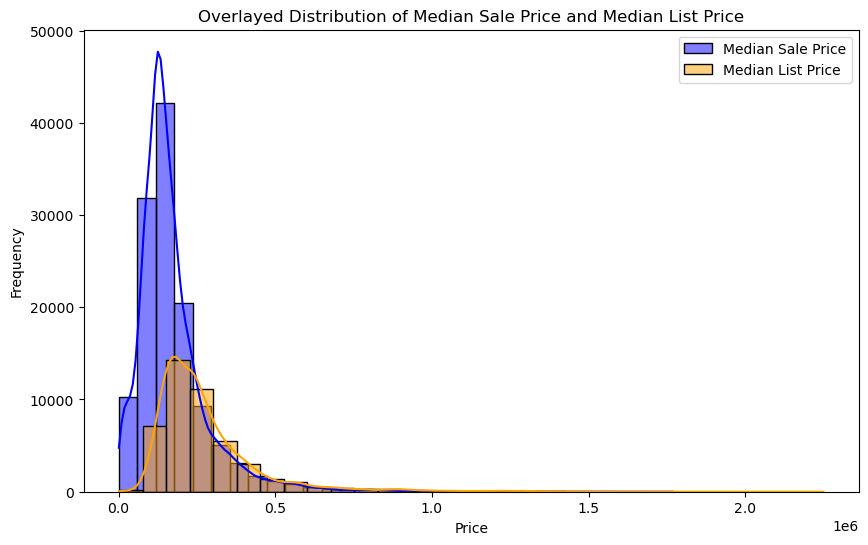

In [45]:



# Overlaying the plots for MedianSalePrice and MedianListPrice
plt.figure(figsize=(10, 6))

# Overlaying histograms for both median sale price and median list price
sns.histplot(data['MedianSalePrice'], kde=True, bins=30, color='blue', label='Median Sale Price')
sns.histplot(data['MedianListPrice'].dropna(), kde=True, bins=30, color='orange', label='Median List Price')

plt.title('Overlayed Distribution of Median Sale Price and Median List Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()

plt.show()


In [46]:
gdf_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf_usa = gdf_world[gdf_world['name'] == 'United States of America'].explode(index_parts=True)
gdf_world.to_csv('sam-resources/world.csv', index=False)

/var/folders/yk/gblyv4gs4s5fjfks1jm4lkhw0000gp/T/ipykernel_12729/2558835233.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gdf_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


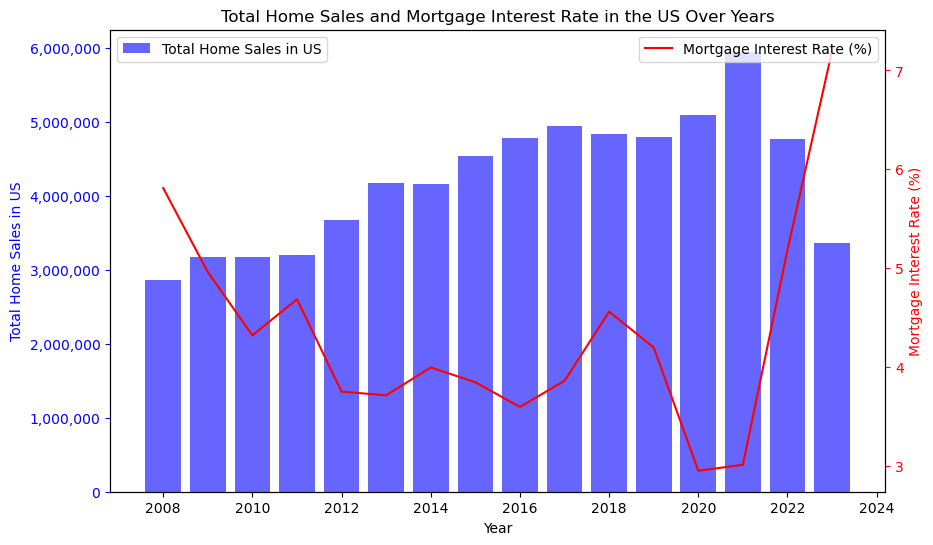

In [47]:


# Filtering data specifically for the United States and aggregating by year
us_data = data[data['CityName'] == 'United States'].groupby('Year').agg({'SalesTotal':'sum', 'MORTGAGE30US':'mean'}).dropna()

# Creating the combined graph for US data
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar graph for home sales in the US
ax1.bar(us_data.index, us_data['SalesTotal'], color='b', alpha=0.6, label='Total Home Sales in US')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Home Sales in US', color='b')
ax1.tick_params('y', colors='b')

# Format the y-axis to avoid exponential notation
ax1.get_yaxis().set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Line graph for mortgage interest rate in the US
ax2 = ax1.twinx()
ax2.plot(us_data.index, us_data['MORTGAGE30US'], color='r', label='Mortgage Interest Rate (%)')
ax2.set_ylabel('Mortgage Interest Rate (%)', color='r')
ax2.tick_params('y', colors='r')

# Title and legend
plt.title('Total Home Sales and Mortgage Interest Rate in the US Over Years')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show plot
plt.savefig('png/Total Home Sales and Mortgage Interest Rate in the US Over Years.png', dpi = 300)
plt.show()


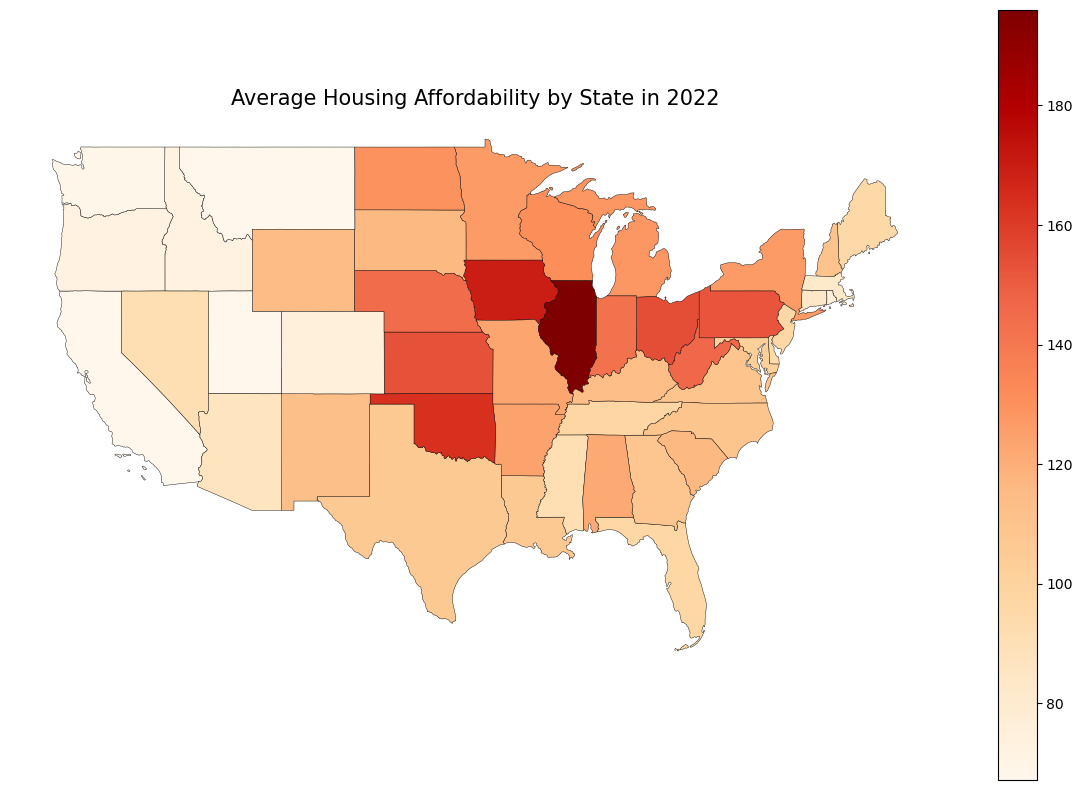

In [48]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import requests
import zipfile
import io

# Step 2: Filter and Aggregate the Data for 2022
data_2022 = data[data['Year'] == 2022]
average_hai_per_state = data_2022.groupby('StateName')['HAI'].mean().reset_index()

# Step 3: Load the US States Shapefile
# Download shapefile from the Census Bureau
shapefile_url = "https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_state_20m.zip"
r = requests.get(shapefile_url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall("us_states_shapefile")

# Load the shapefile
shapefile_path = "us_states_shapefile/cb_2021_us_state_20m.shp"
us_states_map = gpd.read_file(shapefile_path)

# Rename columns to match the housing affordability data
us_states_map = us_states_map.rename(columns={'STUSPS': 'StateName'})

# Step 4: Merge the Data with the Map
merged_map_data = us_states_map.merge(average_hai_per_state, on='StateName', how='left')

# Step 5: Plot the Map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_map_data.plot(column='HAI', ax=ax, legend=True, cmap='OrRd', edgecolor='black', linewidth=0.3)
ax.set_title('Average Housing Affordability by State in 2022', fontsize=15)
plt.axis('off')
plt.savefig('png/Average Housing Affordability by State in 2022.png', dpi = 300)
plt.show()
